In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [56]:
dataset_path = os.path.join('..', 'spectrum_energy_dataset_100k_samples', 'bluetooth_beacon_4MHz.dat')
raw_data = np.fromfile(dataset_path, dtype=np.float32)
raw_data = np.reshape(raw_data, (-1, 1024))

In [57]:
def rf_presence_conv(x:np.ndarray) -> np.ndarray:
    rssi_val_len = np.shape(x)[0]
    bt_rssi = np.zeros((rssi_val_len,), dtype=np.uint8)
    
    for i in range(rssi_val_len):
        if np.max(x[i]) >= -60.0: # Energy above threshold
        # if x[i] >= DETECTION_SENSITIVITY: # Energy above threshold
            bt_rssi[i] = 1
        else: # Energy below threshold
            bt_rssi[i] = 0
    
    return bt_rssi

In [58]:
rf_pres = rf_presence_conv(raw_data)

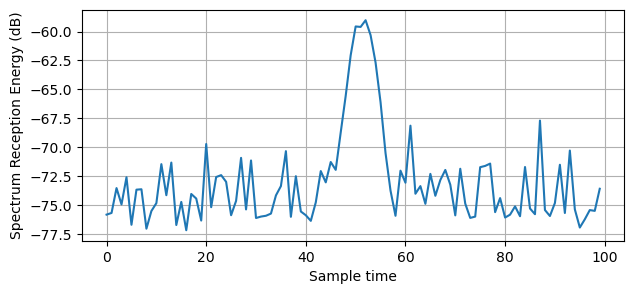

In [59]:
plt.figure(figsize=(7, 3))
plt.plot(np.max(raw_data[1000:1100], axis=1))
plt.xlabel('Sample time')
plt.ylabel('Spectrum Reception Energy (dB)')
plt.grid(True)
plt.show()

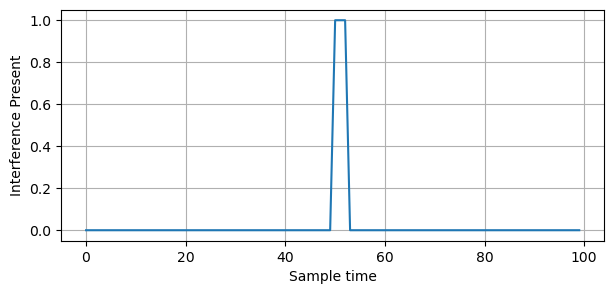

In [60]:
plt.figure(figsize=(7, 3))
plt.plot(rf_pres[1000:1100])
plt.xlabel('Sample time')
plt.ylabel('Interference Present')
plt.grid(True)
plt.show()

AttributeError: 'Axes' object has no attribute 'xlabel'

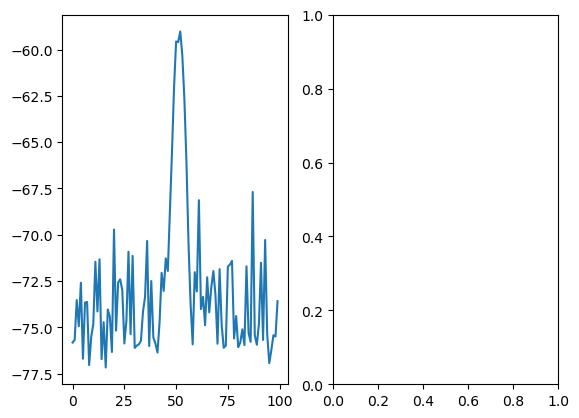

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.max(raw_data[1000:1100], axis=1))
ax1.xlabel('Sample time')
ax1.ylabel('Interference Present')
ax1.grid(True)


ax2.plot(rf_pres[1000:1100])